# **The Sparks Foundation Internship (GRIPFEB21)**

## Name : Rehan Raees

## TASK 1 : Prediction using Supervised ML

### Predict the percentage of an student based on the no. of study hours. 
#### A simple linear regression task as it involves just 2 varialbles.
##### Problem Statement : What will be predicted score if a student studies for 9.25 hrs/ day? 

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Load the data

In [2]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Missing value
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
data.shape

(25, 2)

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Explore the data

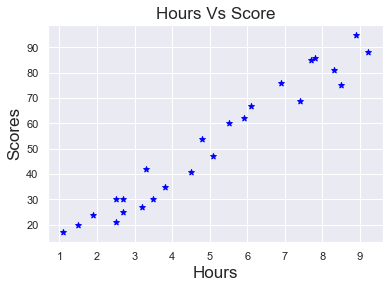

In [7]:
plt.scatter(data.Hours,data.Scores,color = 'Blue',marker = '*')
plt.xlabel('Hours',fontsize = 17)
plt.ylabel('Scores',fontsize = 17)
plt.title('Hours Vs Score',fontsize = 17)
plt.show()

#### Above graph shows the linear relation between Hours and Scores.

## Data Preparation

In [8]:
x = data [['Hours']]
y = data['Scores']

In [9]:
# Now we will use train_test_split method

from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [22]:
len(x_train)

17

In [23]:
len(x_test)

8

### Training the Model
We have split our data into training and testing sets, and now finally it is the time to train our algorithm.

In [24]:
reg = LinearRegression()

In [25]:
reg.fit(x_train,y_train)

LinearRegression()

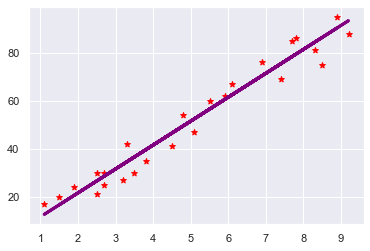

In [26]:
# Plotting the regression line
m = reg.coef_
c = reg.intercept_
yhat = m * x +  c 
# Plotting for the test data
plt.scatter(x,y,color = 'red',marker = '*')
plt.plot(x,yhat,color = 'purple',lw = 3);
plt.show()

## Making Predictions
As we have trained our model, now we can do predictions...

In [27]:
y_pred = reg.predict(x_test)
y_pred

array([20.5654011 , 26.54982797, 70.43562504, 93.37592805, 52.48234442,
       12.58616527, 16.57578318, 28.54463693])

## Comparing Actual vs Predicted

In [28]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
17,24,20.565401
0,21,26.549828
23,76,70.435625
6,88,93.375928
1,47,52.482344
14,17,12.586165
5,20,16.575783
9,25,28.544637


## Testing our Problem
#### Problem Statement : What will be predicted score if a student studies for 9.25 hrs/ day?

In [29]:
hours = 9.25
my_predic = reg.predict(np.array(hours).reshape(-1,1))
print('Number of Hours = {}' .format(hours))
print('Predicted Score = {}' .format(my_predic[0]))

Number of Hours = 9.25
Predicted Score = 93.87463028912897


### Checking the accuracy of the model

In [30]:
print('Accuracy:',reg.score(x_test,y_test))

Accuracy: 0.9674715969407931


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [31]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.598720347679118
